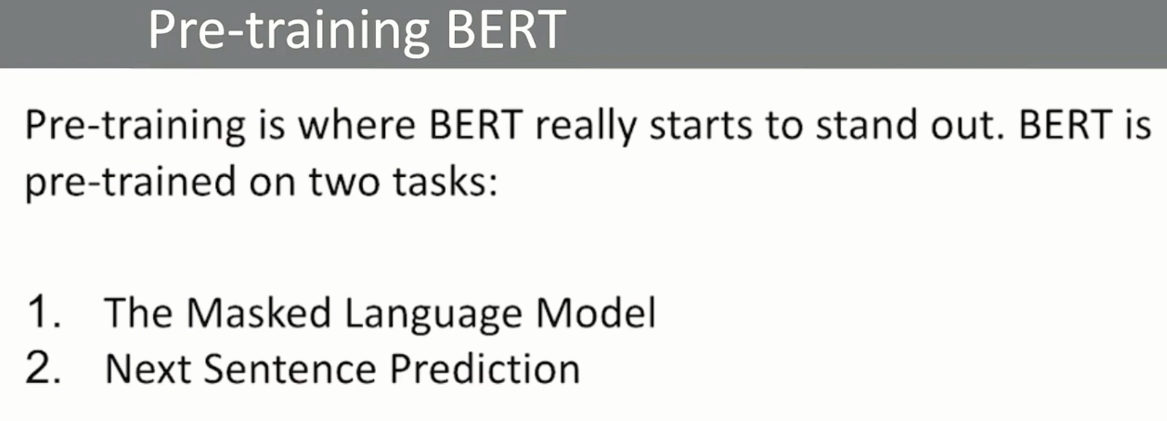

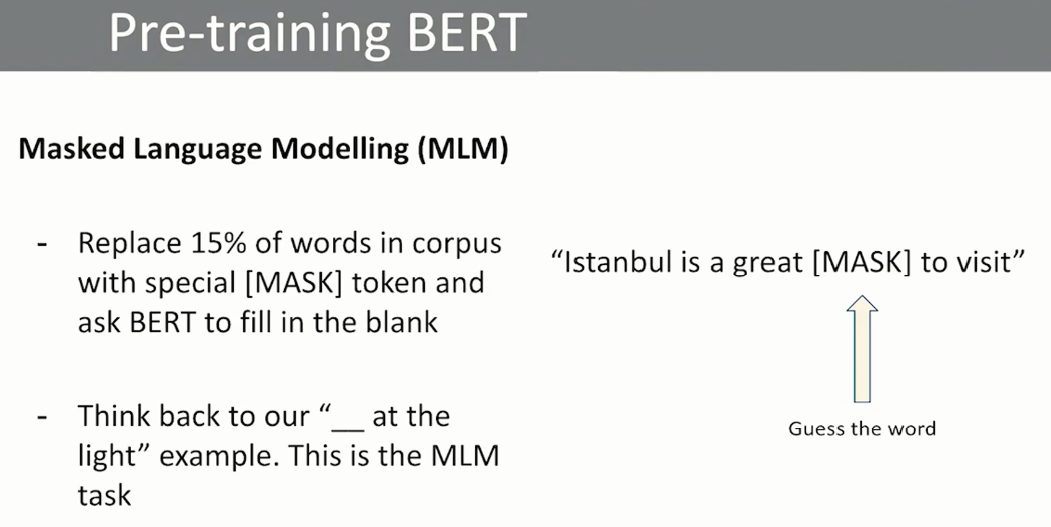

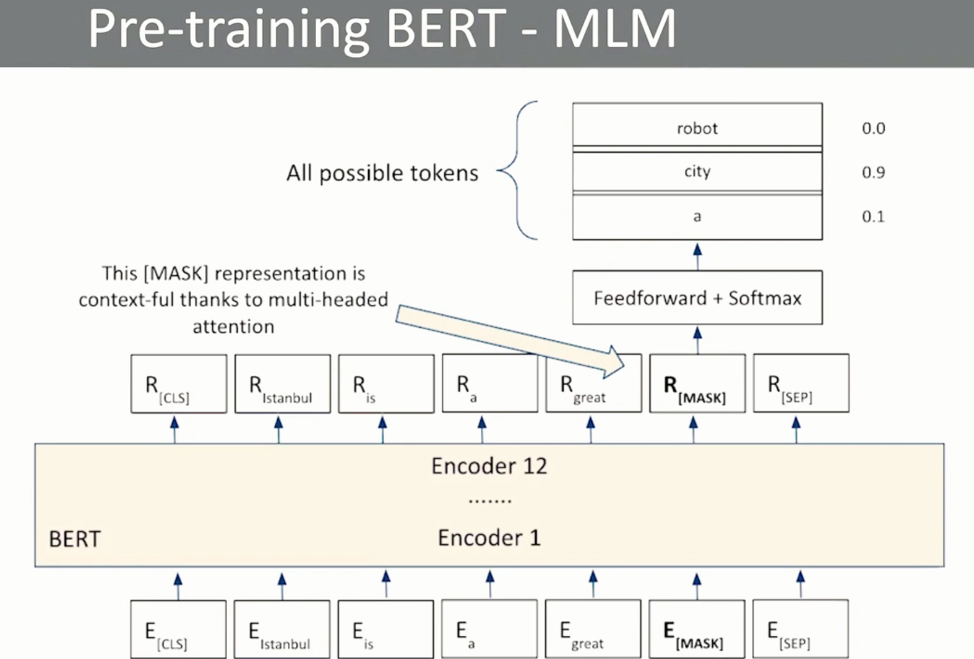

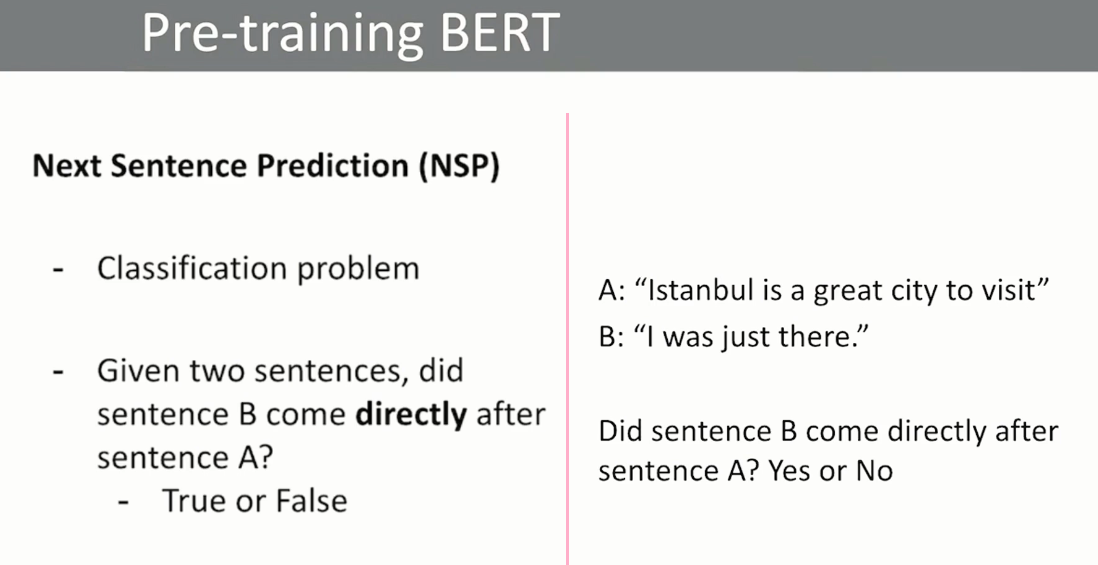

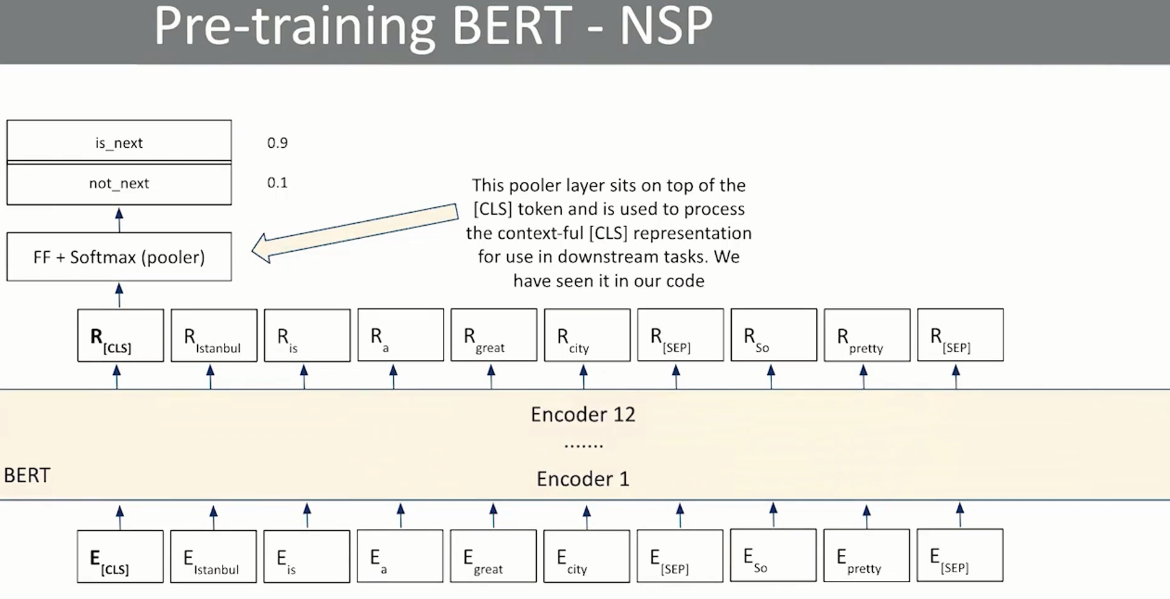

# The Masked Language Modeling Task

In [1]:
from transformers import BertForMaskedLM, pipeline

In [2]:
# Transformers package comes with several standard "heads" on top of the standard BERT model
bert_lm = BertForMaskedLM.from_pretrained('bert-base-cased')

C:\Users\molak\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\molak\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
bert_lm  # inspect the model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [4]:
# Pipelines in transformers take in models/tokenizers and are easy way to perform several tasks

# We can perform an auto-encoder language model task
nlp = pipeline("fill-mask", model='bert-base-cased')  # could also do "model=bert_lm" for the same result

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
type(nlp.model)

transformers.models.bert.modeling_bert.BertForMaskedLM

In [6]:
nlp.tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [7]:
print(type(nlp.model))

preds = nlp(f"If you don’t {nlp.tokenizer.mask_token} at the sign, you will get a ticket.")

print('If you don’t *** at the sign, you will get a ticket.')

for p in preds:
    print(f"Token:{p['token_str']}. Score: {100*p['score']:,.2f}%")

<class 'transformers.models.bert.modeling_bert.BertForMaskedLM'>
If you don’t *** at the sign, you will get a ticket.
Token:look. Score: 48.00%
Token:stop. Score: 42.63%
Token:glance. Score: 1.39%
Token:arrive. Score: 0.88%
Token:turn. Score: 0.62%


# The Next Sentence Prediction Task

In [8]:
from transformers import BertForNextSentencePrediction, BertTokenizer
import torch

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

bert_nsp = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')

In [10]:
bert_nsp

BertForNextSentencePrediction(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [11]:
text = "Deliver huge improvements to your machine learning pipelines without spending hours fine-tuning parameters!"
text2 = "This book’s practical case-studies reveal feature engineering techniques that upgrade your data wrangling—and your ML results."

In [12]:
inputs = tokenizer(text, text2, return_tensors='pt')

In [13]:
inputs

{'input_ids': tensor([[  101,  8116,  4121,  8377,  2000,  2115,  3698,  4083, 13117,  2015,
          2302,  5938,  2847,  2986,  1011, 17372, 11709,   999,   102,  2023,
          2338,  1521,  1055,  6742,  2553,  1011,  2913,  7487,  3444,  3330,
          5461,  2008, 12200,  2115,  2951, 23277,  5654,  2989,  1517,  1998,
          2115, 19875,  3463,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [14]:
inputs.input_ids  # tokens for sentence A and B

tensor([[  101,  8116,  4121,  8377,  2000,  2115,  3698,  4083, 13117,  2015,
          2302,  5938,  2847,  2986,  1011, 17372, 11709,   999,   102,  2023,
          2338,  1521,  1055,  6742,  2553,  1011,  2913,  7487,  3444,  3330,
          5461,  2008, 12200,  2115,  2951, 23277,  5654,  2989,  1517,  1998,
          2115, 19875,  3463,  1012,   102]])

In [15]:
inputs.token_type_ids  # segment Ids (0 == A & 1 == B)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [16]:
inputs.attention_mask  # pay attention to everything

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [17]:
# 0 == "isNextSentence" and 1 == "notNextSentence"
outputs = bert_nsp(**inputs)

outputs

NextSentencePredictorOutput(loss=None, logits=tensor([[ 6.0295, -5.5733]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [18]:
# calculate loss by passing through a label
outputs = bert_nsp(**inputs, labels=torch.LongTensor([0]))
outputs

NextSentencePredictorOutput(loss=tensor(9.1791e-06, grad_fn=<NllLossBackward0>), logits=tensor([[ 6.0295, -5.5733]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [19]:
# calculate loss by passing through a label
outputs = bert_nsp(**inputs, labels=torch.LongTensor([1]))
outputs

NextSentencePredictorOutput(loss=tensor(11.6028, grad_fn=<NllLossBackward0>), logits=tensor([[ 6.0295, -5.5733]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

## Fine-tuning BERT to solve NLP tasks

In [20]:
from transformers import pipeline, BertForQuestionAnswering, BertForTokenClassification, BertForSequenceClassification


In [21]:
bert_sq = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
bert_sq

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [80]:
bert_sq.classifier

Linear(in_features=768, out_features=3, bias=True)

In [22]:
# Finding a classifier on the Huggingface model repository

In [23]:
finbert = pipeline('text-classification', model='ProsusAI/finbert', tokenizer='ProsusAI/finbert')

In [24]:
finbert('Stocks rallied and the British pound gained')

[{'label': 'positive', 'score': 0.6949423551559448}]

In [25]:
finbert('The stock did ok')

[{'label': 'neutral', 'score': 0.8065246343612671}]

In [82]:
finbert.model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [26]:
bert_tc = BertForTokenClassification.from_pretrained('bert-base-uncased')
bert_tc

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [27]:
bert_tc.classifier

Linear(in_features=768, out_features=2, bias=True)

In [28]:
# Finding a token classifier on the Huggingface model repository

In [29]:
# https://huggingface.co/savasy/bert-base-turkish-ner-cased
custom_module = 'savasy/bert-base-turkish-ner-cased'
ner=pipeline('ner', model=custom_module, tokenizer=custom_module)

sequence = "Merhaba! Benim adım Sinan. San Francisco'dan geliyorum" # Hi! I'm Sinan. I come from San Francisco"
ner(sequence)

[{'entity': 'B-PER',
  'score': 0.72424734,
  'index': 5,
  'word': 'Sinan',
  'start': 20,
  'end': 25},
 {'entity': 'B-LOC',
  'score': 0.99879956,
  'index': 7,
  'word': 'San',
  'start': 27,
  'end': 30},
 {'entity': 'I-LOC',
  'score': 0.9977099,
  'index': 8,
  'word': 'Francisco',
  'start': 31,
  'end': 40}]

In [30]:
bert_qa = BertForQuestionAnswering.from_pretrained('bert-base-uncased')
bert_qa

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [31]:
bert_qa.qa_outputs

Linear(in_features=768, out_features=2, bias=True)

In [32]:
# Finding a QA model on the Huggingface model repository

In [33]:
model_name = "deepset/roberta-base-squad2"
qa = pipeline(model=model_name, tokenizer=model_name, revision="v1.0", task="question-answering")

In [34]:
sequence = "Where is Sinan living these days?", "Sinan lives in California but Matt lives in Boston."
qa(*sequence)

{'score': 0.980839729309082, 'start': 15, 'end': 25, 'answer': 'California'}

In [83]:
sequence = "Where is Matt living these days?", "Sinan lives in California but Matt lives in Boston."
qa(*sequence)

{'score': 0.8637672066688538, 'start': 44, 'end': 50, 'answer': 'Boston'}